In [1]:
%matplotlib inline

import glob
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import signal
from sklearn.decomposition import PCA

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


The first step is to find which rows of the locations df correspond to differentially bound regions. 

We start by loading the locations dataset

In [2]:
locations_df=pd.read_csv("Locations")
locations_df.columns = ["a", "chr","start","end"]
del locations_df["a"]
locations_df.head()

,chr,start,end
0,211000022278049,390,394
1,211000022278049,537,541
2,211000022278049,573,577
3,211000022278049,837,841
4,211000022278049,1613,1617


The following dataframe of differentially expressed genes for carcass was created in 20160731_Including_heterochromatic_state.ipynb

In [3]:
diff_expression_df=pd.read_csv("Differentially_expressed_genes_carcass_df")
diff_expression_df.head()

,Unnamed: 0,chr,start,end
0,0,X,245978,254650
1,1,X,585081,620195
2,2,X,946662,947500
3,3,X,2278031,2293411
4,4,X,2622069,2624575


Now we want to find which locations are differentially expressed

In [4]:
locations_df["contains_diff_expressed"]=[0 for ele in locations_df['chr']]
for i,row1 in enumerate(diff_expression_df.iterrows()):
    print i,
    key = str(row1[1]['chr'])     
    subset_chrom_df=locations_df[locations_df.chr == key]
    len_subset_chrom_df = subset_chrom_df.shape[0]
    for j in range(len_subset_chrom_df):
        try:
            if float(row1[1]['end']) >= float(subset_chrom_df.loc[subset_chrom_df.index[j],'end']) and float(row1[1]['start']) <= float(subset_chrom_df.loc[subset_chrom_df.index[j],'start']) :
                #print list(row1[1]), subset_chrom_df.index[j]
                
                locations_df.ix[subset_chrom_df.index[j], 'contains_diff_expressed']=str(list(row1[1]))
                    #diff_expression_df.ix[i,'chromatin_state'] = subset_chrom_df.ix[subset_chrom_df.index[j],'chromatin']
        except:
            pass

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [33]:
locations_df.ix[310020,]

chr                                               X
start                                        250162
end                                          250166
contains_diff_expressed    [0, 'X', 245978, 254650]
Name: 310020, dtype: object

In [7]:
locations_df[locations_df.contains_diff_expressed!=0].tail()

,chr,start,end,contains_diff_expressed
373894,X,22534746,22534750,"[298, 'X', 22529964, 22536371]"
373895,X,22535316,22535320,"[298, 'X', 22529964, 22536371]"
373896,X,22535972,22535976,"[298, 'X', 22529964, 22536371]"
373897,X,22536070,22536074,"[298, 'X', 22529964, 22536371]"
373898,X,22536273,22536277,"[298, 'X', 22529964, 22536371]"


In [8]:
#locations_df.to_csv("locations_df_with_diff_expressed", sep=";")

Now we want to find which locations are differentially bound

In [10]:
lpadj=[]
lpval=[]
for f1 in glob.glob("nbin*"):
    df_padj = pd.read_csv(f1).padj
    df_pval = pd.read_csv(f1).pvalue
    lpadj.append(df_padj)
    lpval.append(df_pval)
pval = pd.concat(lpval, axis = 1)
padj = pd.concat(lpadj, axis = 1)

pval.columns= map(lambda x: x[25:], glob.glob("nbin*"))
pval.head()

padj.columns= map(lambda x: x[25:], glob.glob("nbin*"))
padj.head()

,C_D1,C_Lam,T_D1,T_Lam,W_D1,W_Lam
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
len(pval)

388464

In [12]:
len(locations_df)

388464

In [13]:
padj[locations_df.contains_diff_expressed==0].mean()

C_D1     0.595955
C_Lam    0.408171
T_D1     0.382093
T_Lam    0.493926
W_D1     0.985443
W_Lam    0.935777
dtype: float64

In [14]:
padj[locations_df.contains_diff_expressed!=0].mean()

C_D1     0.610274
C_Lam    0.386429
T_D1     0.416556
T_Lam    0.490505
W_D1     0.986447
W_Lam    0.946208
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e3fccd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f372310>]], dtype=object)

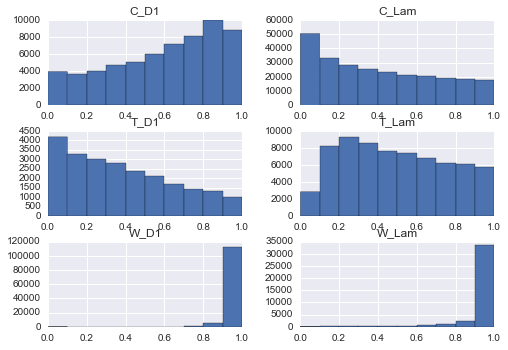

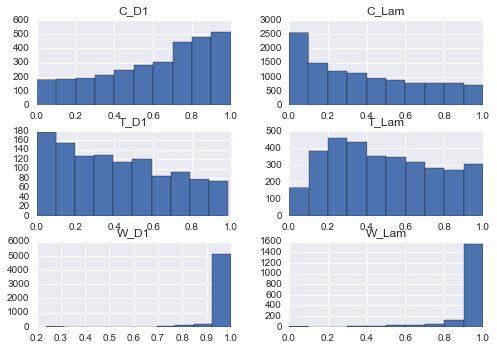

In [16]:
padj[locations_df.contains_diff_expressed==0].hist()
padj[locations_df.contains_diff_expressed!=0].hist()